In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# 데이터 로딩
file_path = "C:/Users/Lenovo/Desktop/week5/abalone.csv"

df = pd.read_csv(file_path)

print(df)
print(df.columns)

        id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485   

In [19]:
# 불필요한 칼럼 제거: id는 제거하고, Sex는 변환
X = df.drop(columns=["id", "Rings"])
# 범주형 변수 처리: Sex를 원-핫 인코딩 (M, F, I → 3개의 컬럼으로 변환)
X = pd.get_dummies(X, columns=["Sex"])
# 목표 변수(y) 설정: Rings를 예측
y = df["Rings"]

print(X.head())  # 입력 데이터 확인
print(y.head())  # 목표 변수 확인

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150  False  False   True  
1         0.070  False  False   True  
2         0.210   True  False  False  
3         0.155  False  False   True  
4         0.055  False   True  False  
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64


In [21]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 10), (3341,), (836, 10), (836,))

In [25]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(10,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,901 (7.43 KB)

 Trainable params: 1,901 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 82.2621 - mse: 82.2621 - val_loss: 8.3420 - val_mse: 8.3420
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5388 - mse: 7.5388 - val_loss: 7.1529 - val_mse: 7.1529
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0041 - mse: 7.0041 - val_loss: 6.9062 - val_mse: 6.9062
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3094 - mse: 6.3094 - val_loss: 6.6182 - val_mse: 6.6182
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6411 - mse: 6.6411 - val_loss: 6.7954 - val_mse: 6.7954
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4661 - mse: 6.4661 - val_loss: 6.3322 - val_mse: 6.3322
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4010 - mse: 6.4010 - val_loss: 6.1304 - val_mse: 6.1304
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3336 - mse: 6.3336 - val_loss: 6.0092 - val_mse: 6.0092
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

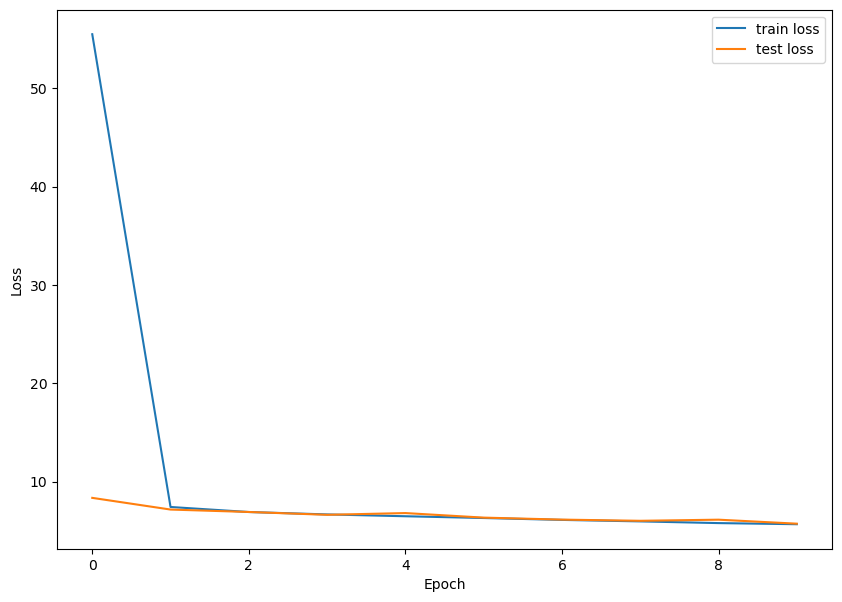

In [31]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2771 - mse: 5.2771


[5.716233253479004, 5.716233253479004]